In [1]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, TensorBoard
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import img_to_array
from tqdm import tqdm
import math

Using TensorFlow backend.


In [2]:
height = 64
width = 256
channel = 3

In [3]:
clean_data_path = 'D:\intern\\classified_data\\clean_data\\extra_clean\\extra_clean'
noisy_15dB_path = 'D:\\intern\\classified_data\\noisy_data\\15dB\\extra_15dB\\extra_15dB'
noisy_20dB_path = 'D:\\intern\\classified_data\\noisy_data\\20dB\\extra_20dB\\extra_20dB'
noisy_25dB_path = 'D:\\intern\\classified_data\\noisy_data\\25dB\\extra_25dB\\extra_25dB'
noisy_30dB_path = 'D:\\intern\\classified_data\\noisy_data\\30dB\\extra_30dB\\extra_30dB'
noisy_100dB_path = 'D:\\intern\\classified_data\\noisy_data\\100dB\\extra_100dB\\extra_100dB'

In [4]:
clean_data_files = os.listdir(clean_data_path)
noisy_15dB_files = os.listdir(noisy_15dB_path)
noisy_20dB_files = os.listdir(noisy_20dB_path)
noisy_25dB_files = os.listdir(noisy_25dB_path)
noisy_30dB_files = os.listdir(noisy_30dB_path)
noisy_100dB_files = os.listdir(noisy_100dB_path)

In [5]:
clean_data = np.zeros((len(clean_data_files), height, width, channel), dtype=np.float32)
noisy_15dB = np.zeros((len(noisy_15dB_files), height, width, channel), dtype=np.float32)
noisy_20dB = np.zeros((len(noisy_20dB_files), height, width, channel), dtype=np.float32)
noisy_25dB = np.zeros((len(noisy_25dB_files), height, width, channel), dtype=np.float32)
noisy_30dB = np.zeros((len(noisy_30dB_files), height, width, channel), dtype=np.float32)
noisy_100dB = np.zeros((len(noisy_100dB_files), height, width, channel), dtype=np.float32)

In [6]:
n=0
for i in tqdm(clean_data_files):
    img = cv2.imread(clean_data_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    clean_data[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:08<00:00, 59.56it/s]


In [7]:
n=0
for i in tqdm(noisy_20dB_files):
    img = cv2.imread(noisy_20dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_20dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00, 73.38it/s]


In [8]:
n=0
for i in tqdm(noisy_25dB_files):
    img = cv2.imread(noisy_25dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_25dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:13<00:00, 36.93it/s]


In [9]:
n=0
for i in tqdm(noisy_30dB_files):
    img = cv2.imread(noisy_30dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_30dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:12<00:00, 41.38it/s]


In [10]:
n=0
for i in tqdm(noisy_100dB_files):
    img = cv2.imread(noisy_100dB_path + '\\' + i, 1)
    img = cv2.resize(img, (width, height)) / 255.
    noisy_100dB[n] = img
    n = n+1

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:08<00:00, 61.11it/s]


In [19]:
model = Sequential([
    
  # encoder 
    Conv2D(128, (3,3), padding="same", activation="relu",  input_shape=(height,width,channel)),
    BatchNormalization(),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)), 
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2),strides=(2,2)),
    
    
    # decoder
    Conv2D(64, (3,3), padding="same", activation="relu"),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    UpSampling2D((2,2)),
    
    Conv2D(channel, (3,3), padding="same", activation="sigmoid") # sigmoid, relu    
])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 64, 256, 128)      3584      
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 256, 128)      512       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 256, 128)      147584    
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 256, 128)      512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 128, 128)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 128, 64)       73792     
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 128, 64)      

In [21]:
early_stop = EarlyStopping(
                monitor='val_loss',
                patience=20, #n of epochs with no improvement which will be stopped training
                verbose=1
            )

log_csv = CSVLogger('logs_100dB.csv',
                   separator=',',
                   append=False
                   )

tensorboard = TensorBoard(
                log_dir='logs_30dB'
            )

callbacks_list = [early_stop, log_csv, tensorboard]

In [22]:
model.compile(optimizer=Adam(lr=0.0001), loss='mse', metrics=['accuracy'])

In [23]:
history = model.fit(noisy_100dB, clean_data,
          validation_split=0.2,
          batch_size=16,
          epochs=10,
          # callbacks=callbacks_list
        )

Train on 400 samples, validate on 100 samples
Epoch 1/10
400/400 [==============================] - 287s 717ms/sample - loss: 0.0165 - accuracy: 0.3560 - val_loss: 0.0405 - val_accuracy: 0.0547
Epoch 2/10
400/400 [==============================] - 328s 821ms/sample - loss: 0.0094 - accuracy: 0.3021 - val_loss: 0.0397 - val_accuracy: 0.0524
Epoch 3/10
400/400 [==============================] - 278s 695ms/sample - loss: 0.0081 - accuracy: 0.3218 - val_loss: 0.0393 - val_accuracy: 0.0560
Epoch 4/10
400/400 [==============================] - 279s 697ms/sample - loss: 0.0080 - accuracy: 0.3160 - val_loss: 0.0390 - val_accuracy: 0.0579
Epoch 5/10
400/400 [==============================] - 332s 829ms/sample - loss: 0.0078 - accuracy: 0.3211 - val_loss: 0.0390 - val_accuracy: 0.0662
Epoch 6/10
400/400 [==============================] - 327s 816ms/sample - loss: 0.0073 - accuracy: 0.3436 - val_loss: 0.0392 - val_accuracy: 0.0540
Epoch 7/10
400/400 [==============================] - 277s 692ms/s

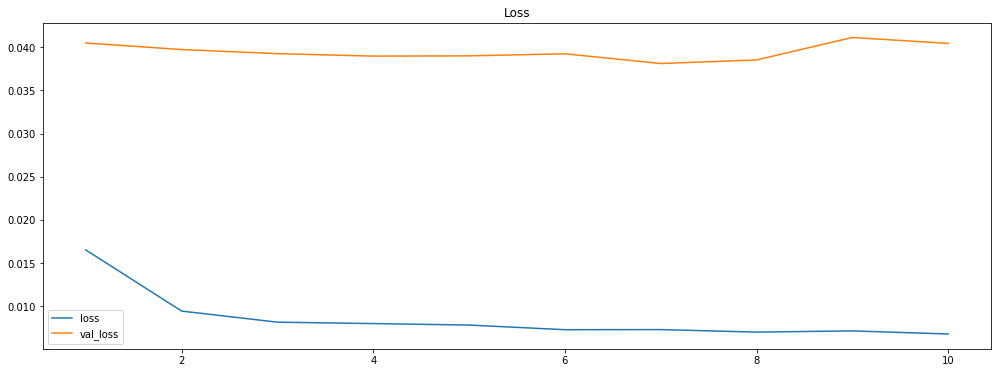

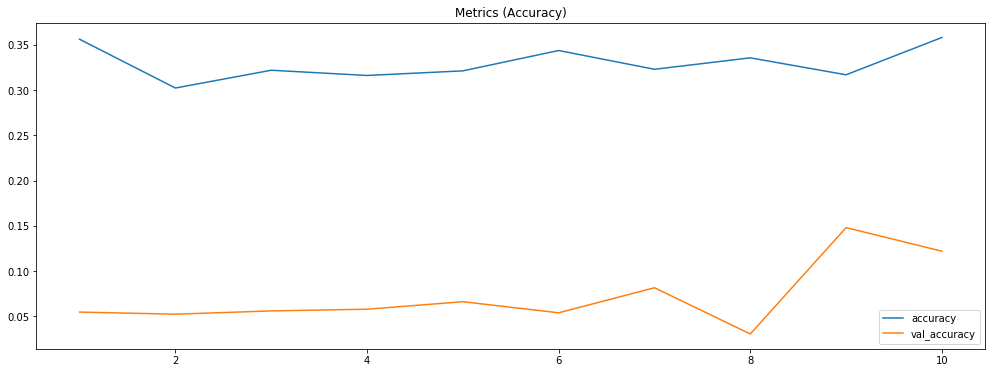

In [24]:
plt.rcParams['figure.figsize'] = (17,6)
fig, ax1 = plt.subplots()
xepochs = range(1,len(history.history['loss']) + 1)

plt.plot(xepochs, history.history['loss'], label = 'loss')
plt.plot(xepochs, history.history['val_loss'], label = 'val_loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(xepochs, history.history['accuracy'], label = 'accuracy')
plt.plot(xepochs, history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Metrics (Accuracy)')
plt.legend()
plt.show()

In [28]:
decoded_100dB = model.predict(noisy_100dB)

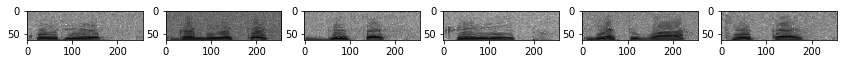

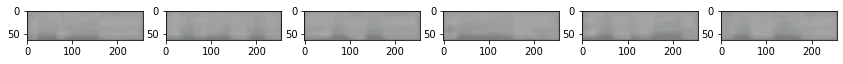

In [31]:
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(noisy_20dB[i])
plt.show()

# Displaying prediction_train images
plt.figure(figsize=(17,4))
for i in range(1,7):
    ax = plt.subplot(1,7,i)
    plt.imshow(decoded_100dB[i])
plt.show()

In [32]:
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse)) 
    return psnr

In [ ]:
print(f'15dB PSNR mean: {PSNR(noisy_15dB, decoded_15dB)}')

for i in range(len(noisy_15dB)):
    
    value = PSNR(noisy_15dB[i], decoded_15dB[i]) 
    print(f"PSNR value is {value} dB")

In [ ]:
print(f'20dB PSNR mean: {PSNR(noisy_20dB, decoded_20dB)}')

for i in range(len(noisy_20dB)):
    
    value = PSNR(noisy_20dB[i], decoded_20dB[i]) 
    print(f"PSNR value is {value} dB")

In [ ]:
print(f'25dB PSNR mean: {PSNR(noisy_25dB, decoded_25dB)}')

for i in range(len(noisy_25dB)):
    
    value = PSNR(noisy_25dB[i], decoded_25dB[i]) 
    print(f"PSNR value is {value} dB")

In [33]:
print(f'100dB PSNR mean: {PSNR(noisy_100dB, decoded_100dB)}')

for i in range(len(noisy_100dB)):
    
    value = PSNR(noisy_100dB[i], decoded_100dB[i]) 
    print(f"PSNR value is {value} dB")

100dB PSNR mean: 59.41753871338704
PSNR value is 60.36304979358342 dB
PSNR value is 60.44194640403796 dB
PSNR value is 59.991428953299774 dB
PSNR value is 60.089212337803346 dB
PSNR value is 59.94990827772477 dB
PSNR value is 59.734841852519764 dB
PSNR value is 60.02932863599521 dB
PSNR value is 56.11964914134835 dB
PSNR value is 59.2147603395485 dB
PSNR value is 60.012320391737106 dB
PSNR value is 59.879696132288856 dB
PSNR value is 59.191147534307056 dB
PSNR value is 59.626156627412506 dB
PSNR value is 59.63561751872885 dB
PSNR value is 56.11964914134835 dB
PSNR value is 60.08273834779914 dB
PSNR value is 56.11964914134835 dB
PSNR value is 60.800998482207774 dB
PSNR value is 59.37556313191301 dB
PSNR value is 59.42046309570464 dB
PSNR value is 60.196554353078824 dB
PSNR value is 59.8307600990342 dB
PSNR value is 59.405446395079 dB
PSNR value is 56.11964914134835 dB
PSNR value is 60.75550729762948 dB
PSNR value is 59.99748814707055 dB
PSNR value is 59.55597941171846 dB
PSNR value is 5

PSNR value is 60.25792567330767 dB
PSNR value is 56.11964914134835 dB
PSNR value is 56.11964914134835 dB
PSNR value is 59.98086894845186 dB
PSNR value is 60.06999977982034 dB
PSNR value is 61.47242145273205 dB
PSNR value is 60.74115675179896 dB
PSNR value is 59.810769708894455 dB
PSNR value is 60.9230372901973 dB
PSNR value is 60.387163894500745 dB
PSNR value is 56.11964914134835 dB
PSNR value is 56.11964914134835 dB
PSNR value is 59.77466762927123 dB
PSNR value is 56.11964914134835 dB
PSNR value is 60.229439416812895 dB
PSNR value is 60.58453057335301 dB
PSNR value is 59.978402910358795 dB
PSNR value is 61.302671708860224 dB
PSNR value is 61.825375438336955 dB
PSNR value is 56.11964914134835 dB
PSNR value is 61.74693891403842 dB
PSNR value is 60.945097043887344 dB
PSNR value is 56.11964914134835 dB
PSNR value is 61.54550318957788 dB
PSNR value is 61.428902153153295 dB
PSNR value is 60.19151006037696 dB
PSNR value is 61.003793208182 dB
PSNR value is 56.11964914134835 dB
PSNR value is 6